In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# ANÁLISIS DE LA IMPORTANCIA DE LAS CARACTERÍSITICAS.

Una vez obtenida la importancia de las caractrísticas para cada cluster se naliazarán con más detalle.

In [52]:
data = pd.read_csv("Data/train.csv")
data = data.drop(data[data['LotFrontage'] == 313].index)

cleaned_data = pd.read_csv("Data/cleaned_data_with_clusters.csv")
importances = pd.read_csv('Data/feature_importances.csv')
test= pd.read_csv("Data/test_2.csv")


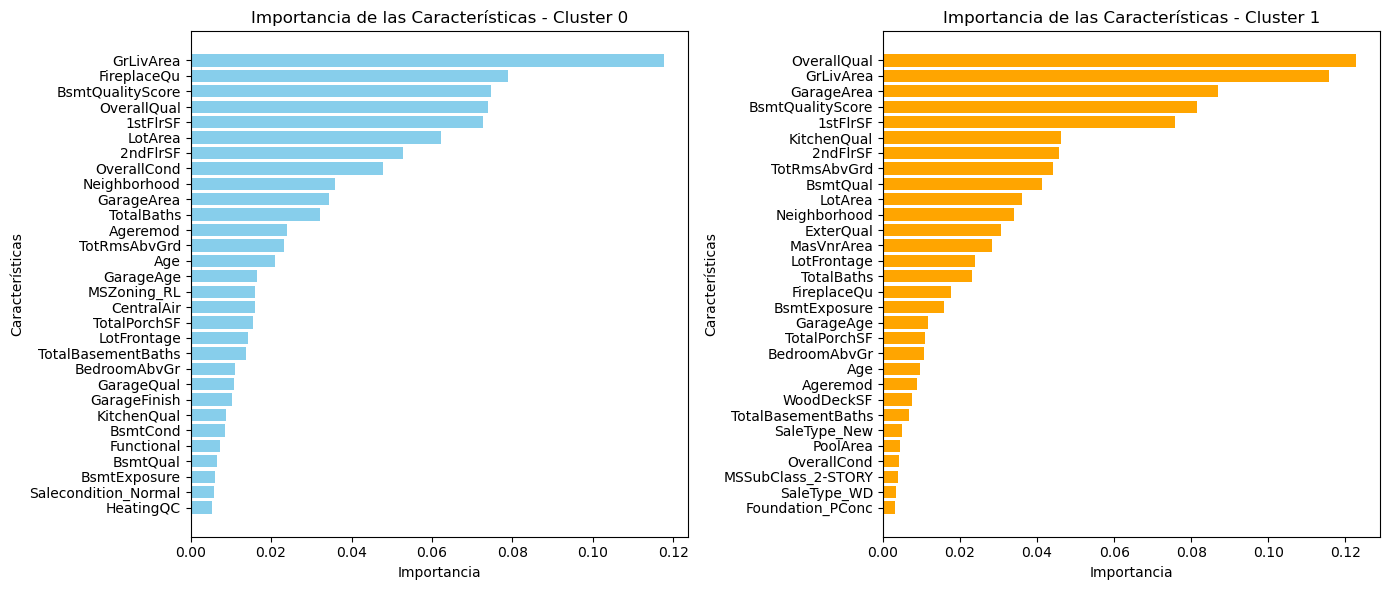

In [12]:
# Cargar los modelos de Gradient Boosting para cada clúster
gb_model_0 = joblib.load("Data/gb_model_cluster_0.pkl")
gb_model_1 = joblib.load("Data/gb_model_cluster_1.pkl")

# Extraer las importancias de las características de cada modelo
importances_0 = gb_model_0.feature_importances_
importances_1 = gb_model_1.feature_importances_

# Obtener los nombres de las características del conjunto de datos (usado previamente)
cleaned_data = pd.read_csv("Data/cleaned_data_with_clusters.csv")
X = cleaned_data.drop(columns=['SalePrice', 'Cluster'])
feature_names = X.columns

# Crear un DataFrame con las importancias y características para el Cluster 0
importance_df_0 = pd.DataFrame({'Feature': feature_names, 'Importance': importances_0})
importance_df_0 = importance_df_0.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Crear un DataFrame con las importancias y características para el Cluster 1
importance_df_1 = pd.DataFrame({'Feature': feature_names, 'Importance': importances_1})
importance_df_1 = importance_df_1.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Añadir la columna 'Rank' que es el ranking de las importancias
importance_df_0['Rank'] = importance_df_0.index + 1
importance_df_1['Rank'] = importance_df_1.index + 1

# Reorganizar las columnas para el formato requerido
importance_df_0 = importance_df_0[['Rank', 'Feature', 'Importance']]
importance_df_1 = importance_df_1[['Rank', 'Feature', 'Importance']]

# Guardar los DataFrames en archivos CSV (si se necesita)
importance_df_0.to_csv('Data/importance_cluster_0.csv', index=False)
importance_df_1.to_csv('Data/importance_cluster_1.csv', index=False)

# Crear las subgráficas (opcional) para visualizar las 10 características más importantes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas
axes = axes.flatten()  # Aplanar los ejes para que sea más fácil trabajar con ellos

# Graficar las características más importantes para el Cluster 0
axes[0].barh(importance_df_0['Feature'].head(30), importance_df_0['Importance'].head(30), color='skyblue')
axes[0].set_title('Importancia de las Características - Cluster 0')
axes[0].set_xlabel('Importancia')
axes[0].set_ylabel('Características')
axes[0].invert_yaxis()  # Invertir el eje Y para que las características más importantes estén arriba

# Graficar las características más importantes para el Cluster 1
axes[1].barh(importance_df_1['Feature'].head(30), importance_df_1['Importance'].head(30), color='orange')
axes[1].set_title('Importancia de las Características - Cluster 1')
axes[1].set_xlabel('Importancia')
axes[1].set_ylabel('Características')
axes[1].invert_yaxis()  # Invertir el eje Y para que las características más importantes estén arriba

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()


Para cada cluster varía el orden de las importancias, indicando patrones distintos a la hora de predecir los precios.

### Valor de las viviendas según los clusters.

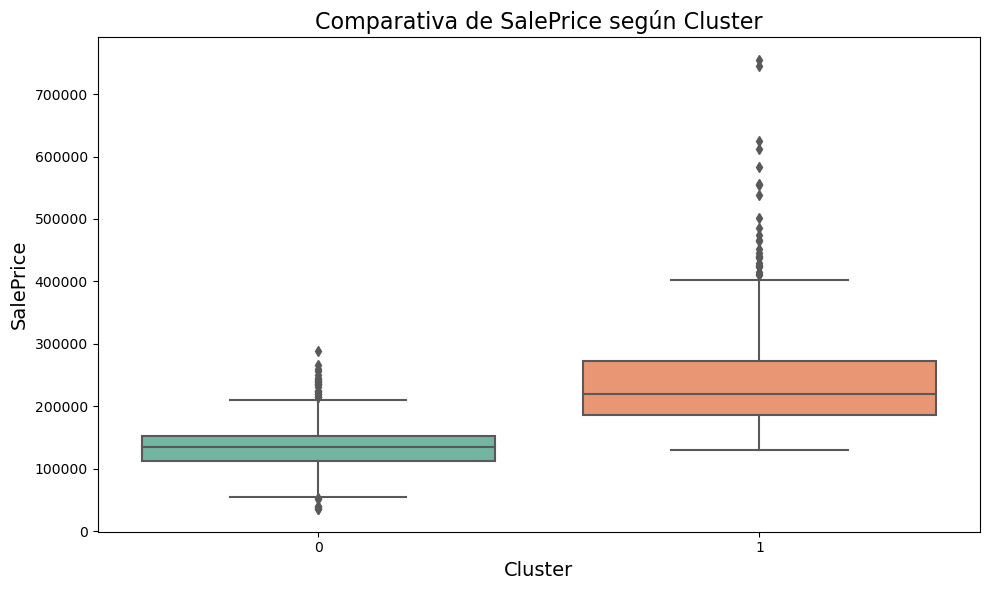

In [9]:
# Graficar la comparación de SalePrice según el Cluster
plt.figure(figsize=(10, 6))

sns.boxplot(x='Cluster', y='SalePrice', data=cleaned_data, palette="Set2")

# Configurar título y etiquetas
plt.title('Comparativa de SalePrice según Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Viendo la distribución de la variable **SalePrice** (que no se utilizó para hacer los clústeres), se observa que el **Low Price Cluster** está asociado a precios más bajos que el **High Price Cluster**. Por lo tanto, las diferencias en el orden de las importancias se explicarán en gran parte en relación con el valor de la vivienda. Esto permitirá entender mejor qué factores influyen en cada uno de los dos casos.


### Características de importancia similar en ambos clusters:
Ciertas características, como **GrLivArea** (área total habitable a nivel del suelo), **BsmtQualityScore** (una medida que combina la superficie y la calidad de los acabados del sótano) y **1stFlrSF** (superficie del primer piso), tienen gran importancia en ambos clústeres. De manera general, factores como una mayor superficie habitable o un buen sótano incrementan el valor de la propiedad.



### Características que varían según el clúster:

Ciertas características que en viviendas de gran valor se dan por sentadas, pueden representar un factor diferencial en viviendas más modestas. Por ejemplo, una buena chimenea (**FirePlaceQual**) puede ser determinante en una vivienda media. Otro buen ejemplo es el aire acondicionado (**CentralAir**) o una buena calefacción (**HeatingQC**).

Las viviendas más caras, por su parte, presentan una serie de variables exclusivas asociadas con el lujo: **PoolArea**, terraza de madera (**WoodDeckSF**) o darle importancia a la calidad de los materiales exteriores (**ExterQual**). Un caso curioso es **GarageArea**, que es la tercera más importante en el **High Price Cluster**. Una posible explicación sería que las personas que se pueden permitir esas casas tienen varios vehículos y necesitan garajes más amplios.




### Comparativa entre calidad y condicion

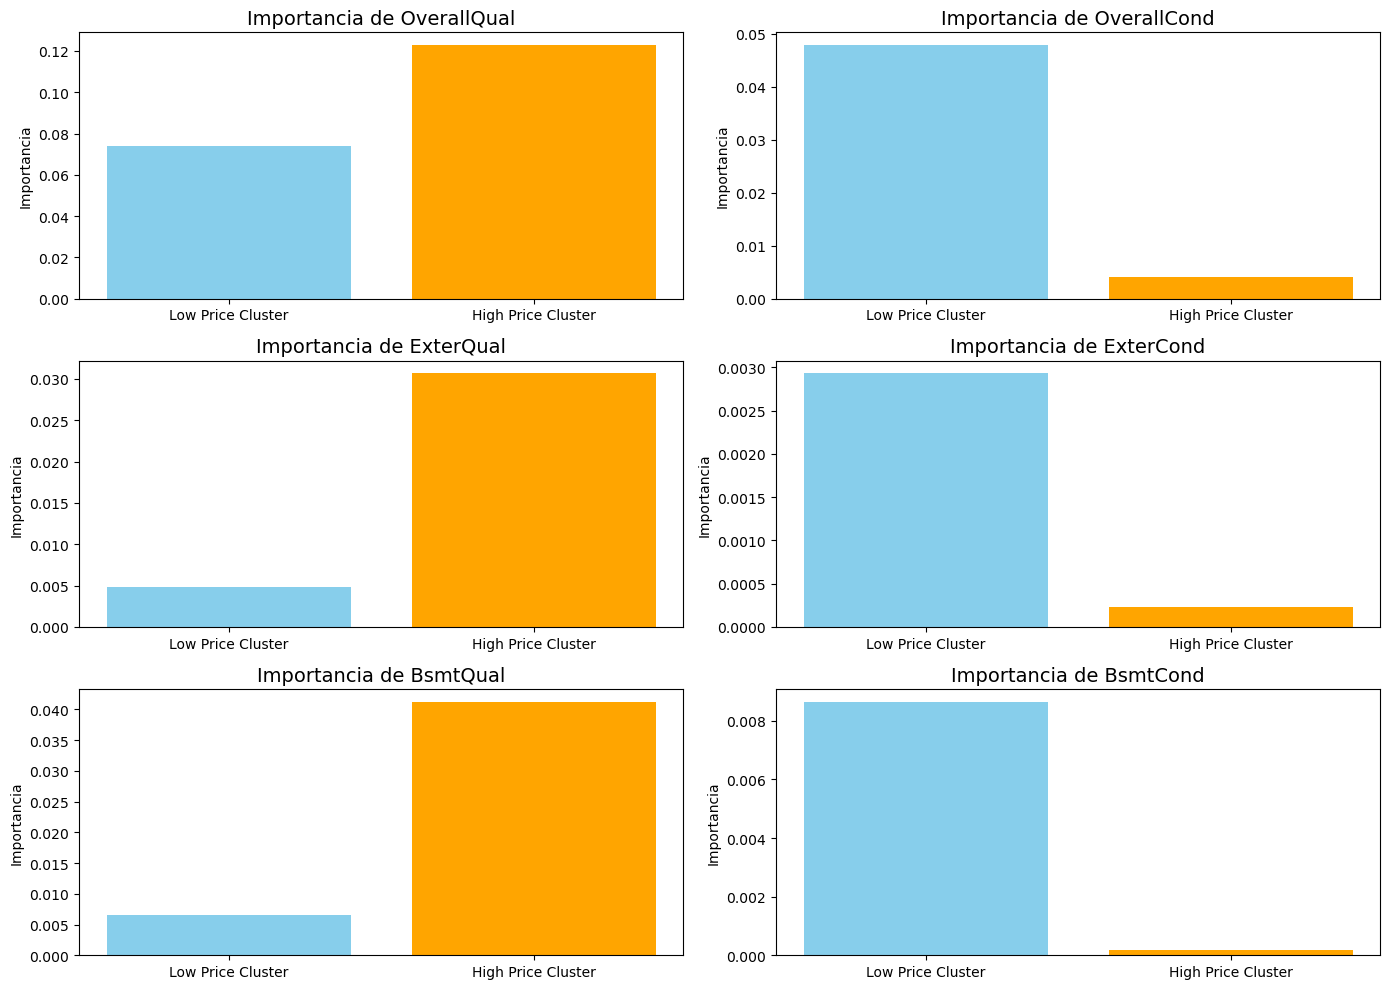

In [16]:
# Cargar los DataFrames con las importancias de las características
importance_df_0 = pd.read_csv('Data/importance_cluster_0.csv')
importance_df_1 = pd.read_csv('Data/importance_cluster_1.csv')

# Definir las características a comparar
features = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond']

# Crear el gráfico de subgráficos
fig, axes = plt.subplots(3, 2, figsize=(14, 10))  # 3 filas, 2 columnas

# Fila 1: OverallQual y OverallCond
axes[0, 0].bar(['Low Price Cluster', 'High Price Cluster'], [
    importance_df_0[importance_df_0['Feature'] == 'OverallQual']['Importance'].values[0],
    importance_df_1[importance_df_1['Feature'] == 'OverallQual']['Importance'].values[0]
], color=['skyblue', 'orange'])
axes[0, 0].set_title('Importancia de OverallQual', fontsize=14)
axes[0, 0].set_ylabel('Importancia')

axes[0, 1].bar(['Low Price Cluster', 'High Price Cluster'], [
    importance_df_0[importance_df_0['Feature'] == 'OverallCond']['Importance'].values[0],
    importance_df_1[importance_df_1['Feature'] == 'OverallCond']['Importance'].values[0]
], color=['skyblue', 'orange'])
axes[0, 1].set_title('Importancia de OverallCond', fontsize=14)
axes[0, 1].set_ylabel('Importancia')

# Fila 2: ExterQual y ExterCond
axes[1, 0].bar(['Low Price Cluster', 'High Price Cluster'], [
    importance_df_0[importance_df_0['Feature'] == 'ExterQual']['Importance'].values[0],
    importance_df_1[importance_df_1['Feature'] == 'ExterQual']['Importance'].values[0]
], color=['skyblue', 'orange'])
axes[1, 0].set_title('Importancia de ExterQual', fontsize=14)
axes[1, 0].set_ylabel('Importancia')

axes[1, 1].bar(['Low Price Cluster', 'High Price Cluster'], [
    importance_df_0[importance_df_0['Feature'] == 'ExterCond']['Importance'].values[0],
    importance_df_1[importance_df_1['Feature'] == 'ExterCond']['Importance'].values[0]
], color=['skyblue', 'orange'])
axes[1, 1].set_title('Importancia de ExterCond', fontsize=14)
axes[1, 1].set_ylabel('Importancia')

# Fila 3: BsmtQual y BsmtCond
axes[2, 0].bar(['Low Price Cluster', 'High Price Cluster'], [
    importance_df_0[importance_df_0['Feature'] == 'BsmtQual']['Importance'].values[0],
    importance_df_1[importance_df_1['Feature'] == 'BsmtQual']['Importance'].values[0]
], color=['skyblue', 'orange'])
axes[2, 0].set_title('Importancia de BsmtQual', fontsize=14)
axes[2, 0].set_ylabel('Importancia')

axes[2, 1].bar(['Low Price Cluster', 'High Price Cluster'], [
    importance_df_0[importance_df_0['Feature'] == 'BsmtCond']['Importance'].values[0],
    importance_df_1[importance_df_1['Feature'] == 'BsmtCond']['Importance'].values[0]
], color=['skyblue', 'orange'])
axes[2, 1].set_title('Importancia de BsmtCond', fontsize=14)
axes[2, 1].set_ylabel('Importancia')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()


Al observar la posición de **OverallQual** (Calidad general de la construcción) y **OverallCond** (Condición-estado general de la construcción) en cada clúster, se observa que sus posiciones están invertidas. Y no sólo eso, este patrón también se repite en los otros dos pares de Calidad-Condición (**ExterQual**, **ExterCond**, **BsmtQual** y **BsmtCond**). 

La explicación podría ser que en viviendas de alto valor, la calidad de los materiales es más importante que el estado de conservación de los mismos. Por ejemplo, unas escaleras de mármol de Carrara incrementarán el valor de la propiedad aunque estén algo gastadas. Mientras que en las casas más baratas, hechas con materiales más modestos, lo que prima es el buen estado de los mismos, ya que esto garantiza su funcionalidad. 

La funcionalidad, por cierto, también es una variable (**Functional**) que solo aparece en el **top 30** en **Low Price Houses**.


### Evolución de los precios en los distintos barrios

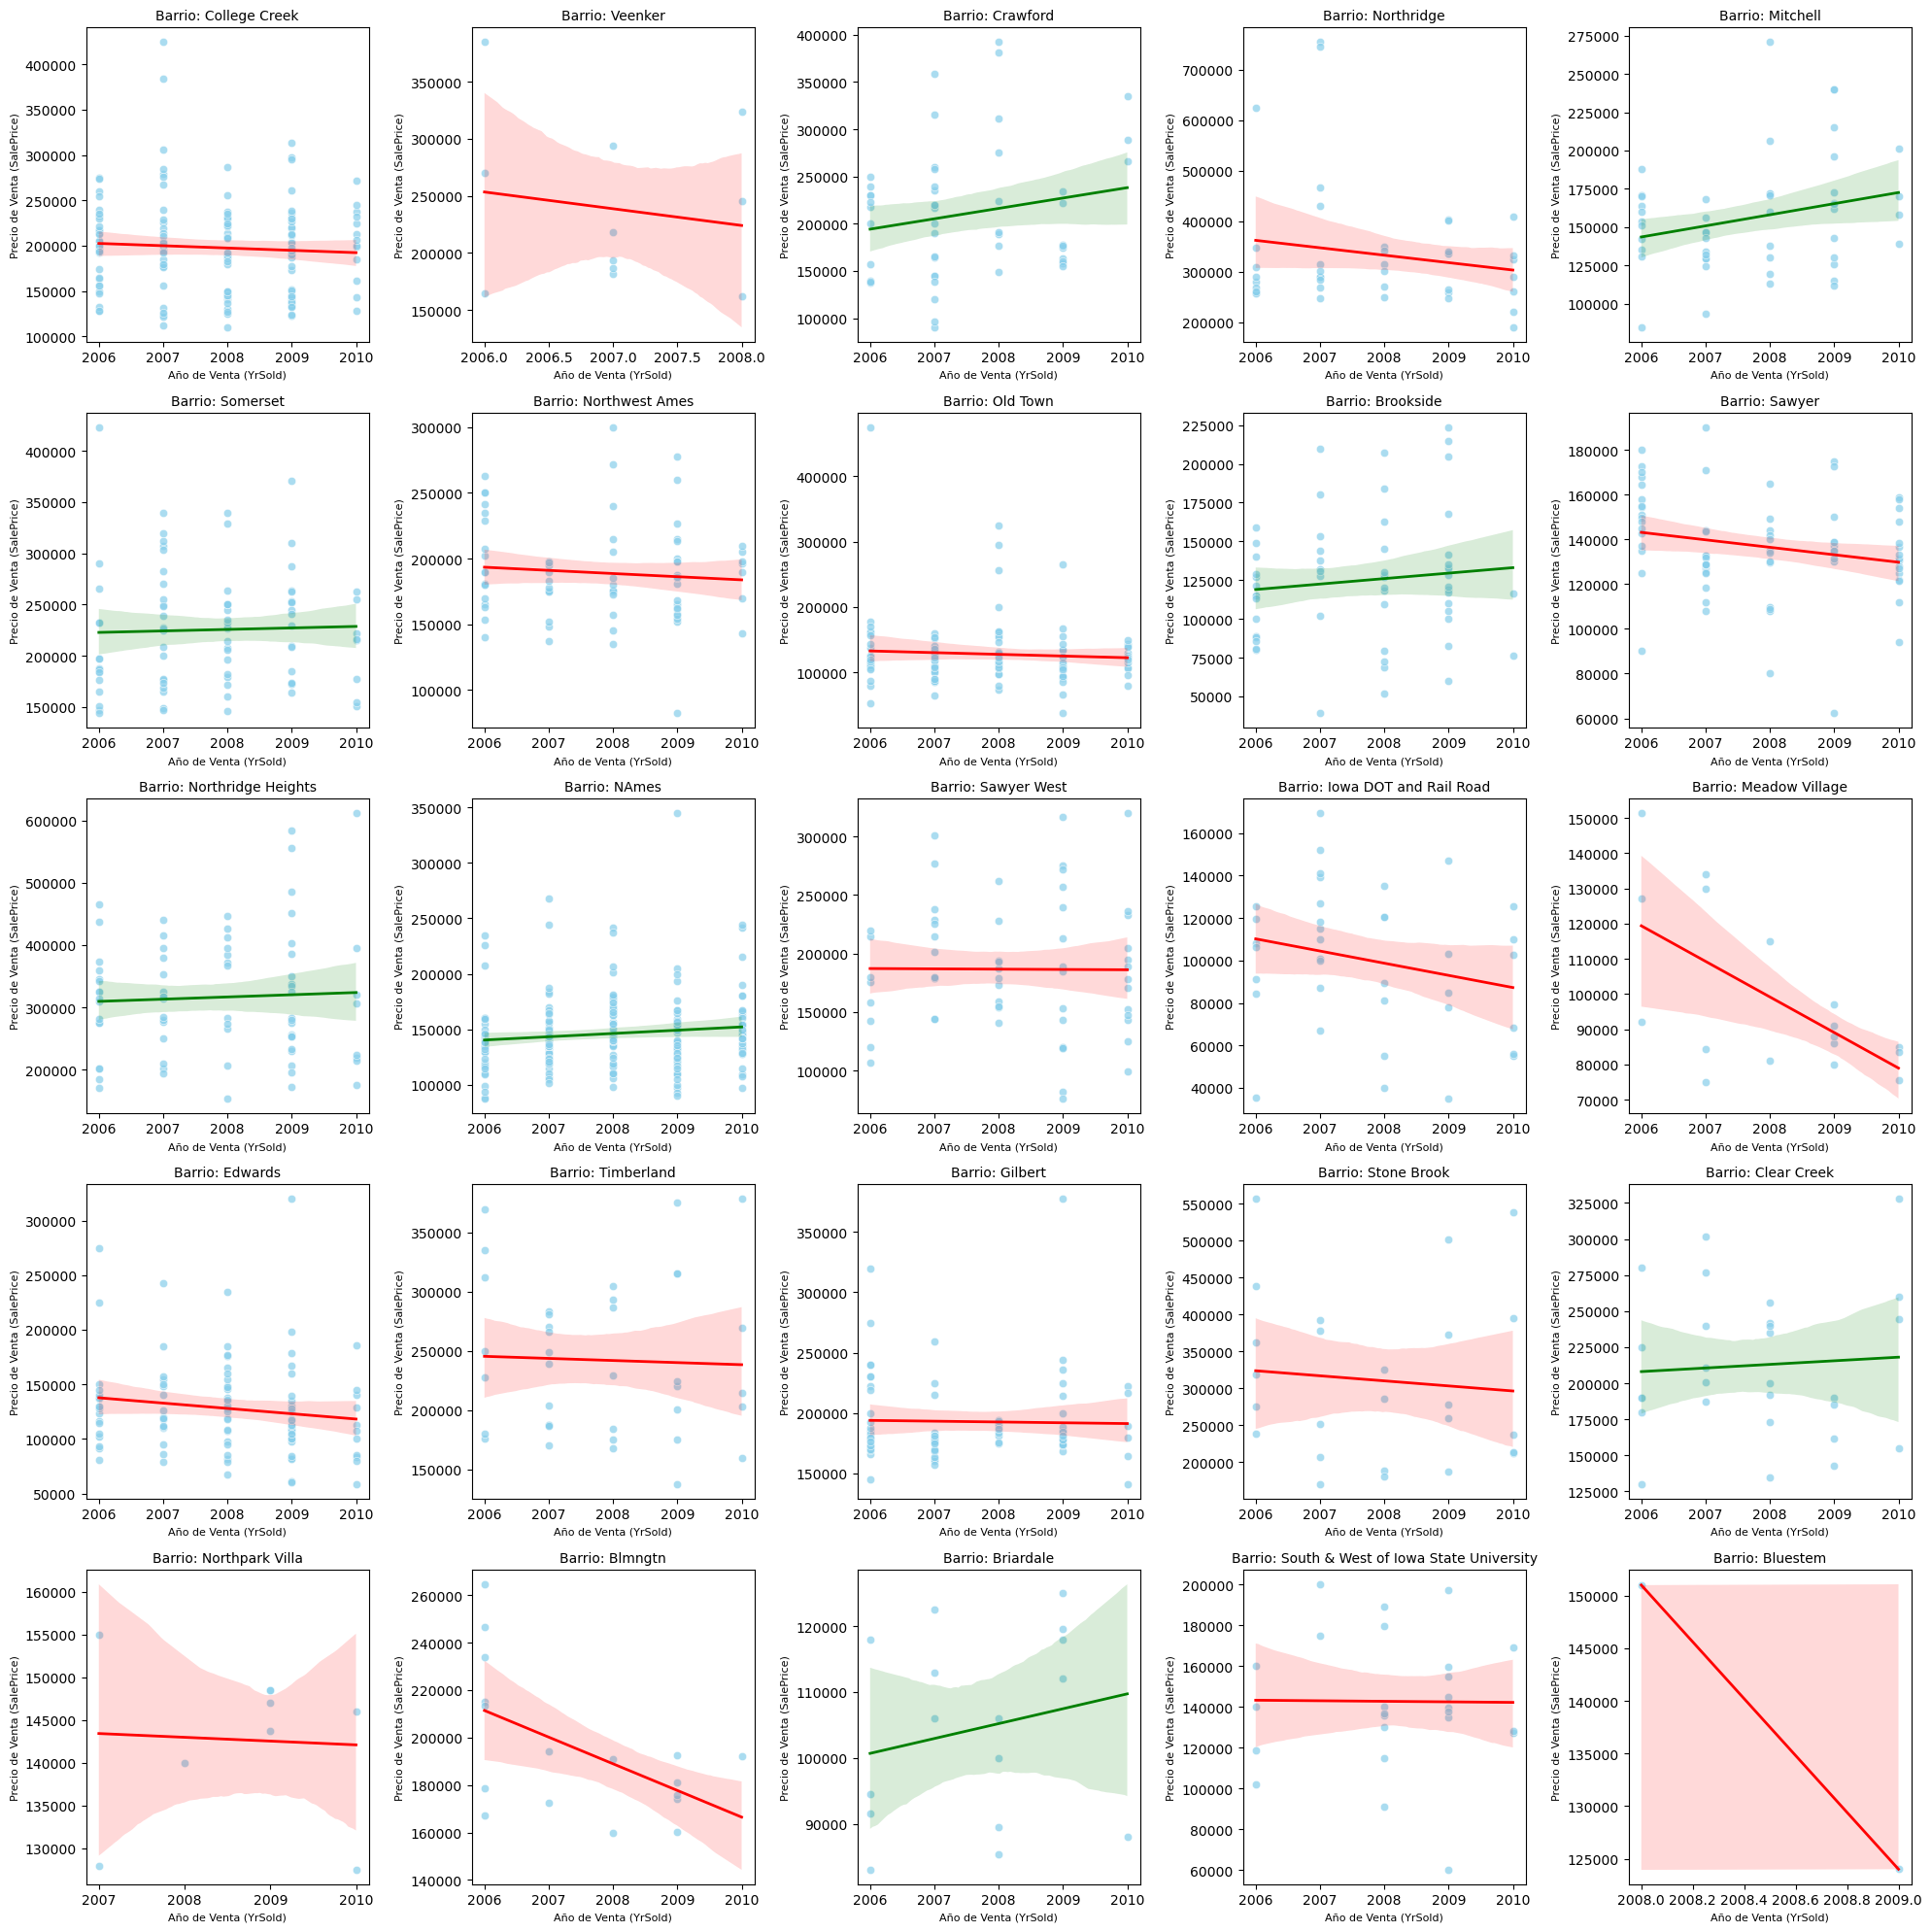

In [67]:
# Cargar el dataframe 'data'
data = pd.read_csv("Data/train.csv")

# Diccionario para cambiar los nombres de los barrios
neighborhood_map = {
    'lmngtn': 'Bloomington Heights',
    'Blueste': 'Bluestem',
    'BrDale': 'Briardale',
    'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek',
    'CollgCr': 'College Creek',
    'Crawfor': 'Crawford',
    'Edwards': 'Edwards',
    'Gilbert': 'Gilbert',
    'IDOTRR': 'Iowa DOT and Rail Road',
    'MeadowV': 'Meadow Village',
    'Mitchel': 'Mitchell',
    'Names': 'North Ames',
    'NoRidge': 'Northridge',
    'NPkVill': 'Northpark Villa',
    'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames',
    'OldTown': 'Old Town',
    'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer',
    'SawyerW': 'Sawyer West',
    'Somerst': 'Somerset',
    'StoneBr': 'Stone Brook',
    'Timber': 'Timberland',
    'Veenker': 'Veenker'
}

# Obtener los barrios únicos
neighborhoods = data['Neighborhood'].unique()

# Establecer el número de filas y columnas para el subplot
n_rows = 5  # Número de filas
n_cols = 5  # Número de columnas

# Crear la figura y los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Aplanar los ejes para recorrerlos fácilmente
axes = axes.flatten()

# Graficar para cada barrio
for i, neighborhood in enumerate(neighborhoods):
    ax = axes[i]  # Obtener el eje correspondiente
    # Filtrar el dataframe por el barrio
    neighborhood_data = data[data['Neighborhood'] == neighborhood]
    
    # Graficar un scatterplot para los precios de venta vs año de venta
    sns.scatterplot(data=neighborhood_data, x='YrSold', y='SalePrice', ax=ax, color='skyblue', alpha=0.7)
    
    # Realizar la regresión lineal con statsmodels para obtener la pendiente
    import statsmodels.api as sm
    X = sm.add_constant(neighborhood_data['YrSold'])  # Agregar una constante para el término independiente
    y = neighborhood_data['SalePrice']
    
    model = sm.OLS(y, X).fit()  # Ajustar el modelo de regresión
    slope = model.params[1]  # Obtener la pendiente de la regresión
    
    # Determinar el color de la línea de tendencia
    reg_color = 'green' if slope > 0 else 'red'  # Verde para pendiente ascendente, rojo para descendente
    
    # Graficar la línea de tendencia (regresión)
    sns.regplot(data=neighborhood_data, x='YrSold', y='SalePrice', ax=ax, scatter=False, color=reg_color, line_kws={'lw': 2})
    
    # Cambiar el título utilizando el diccionario para mapear el barrio
    neighborhood_full_name = neighborhood_map.get(neighborhood, neighborhood)  # Usar el nombre completo del barrio
    ax.set_title(f'Barrio: {neighborhood_full_name}', fontsize=10)
    ax.set_xlabel('Año de Venta (YrSold)', fontsize=8)
    ax.set_ylabel('Precio de Venta (SalePrice)', fontsize=8)

# Ajustar el diseño para que las gráficas no se solapen
plt.tight_layout()
plt.show()


La variable **`Neighborhood`**, que se refiere al barrio en el que están ubicadas las propiedades, presenta gran importancia en ambos clústeres. Saber en qué barrios ha ido incrementando el precio de las viviendas y en cuáles está bajando podría ser una valiosa información para predecir no solo el valor actual de una propiedad, sino también su evolución en el futuro próximo. De acuerdo con los datos, barrios como **Crawford**, **Mitchell** o **Briardale** serían excelentes opciones para invertir, mientras que sería recomendable mantenerse alejado de **Meadow Village** o **Bloomington Heights**.
